In [ ]:
# =====================================
# Import Required Libraries
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Optional: for better visuals
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Step 1 :-Checking Summary Of Dataset
print('Shape Of Dataset',df.shape)
print('Size Of Dataset',df.size)

Shape Of Dataset (7043, 21)
Size Of Dataset 147903


In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


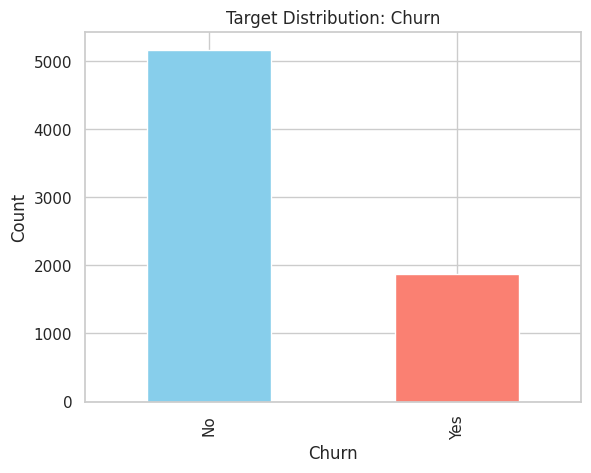

In [ ]:
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Target Distribution: Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [ ]:
df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
# Step 2 :- Data Cleaning And Preprocessing

# Convert TotalCharges to numeric (force errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with 0 or median (choose based on EDA)
df['TotalCharges'].fillna(0, inplace=True)

In [ ]:
# Drop Column
df.drop('customerID', axis=1, inplace=True)

In [ ]:
# Converting Target Column Into Numerical
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# Encoding Columns
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", cat_cols)

# Apply get_dummies (One-hot encoding)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


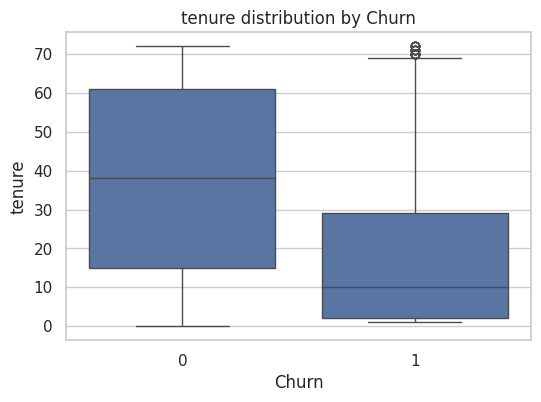

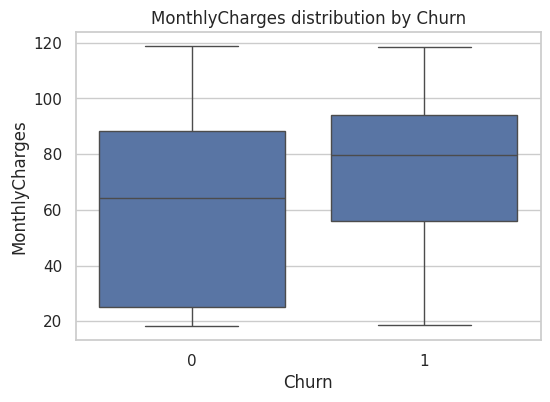

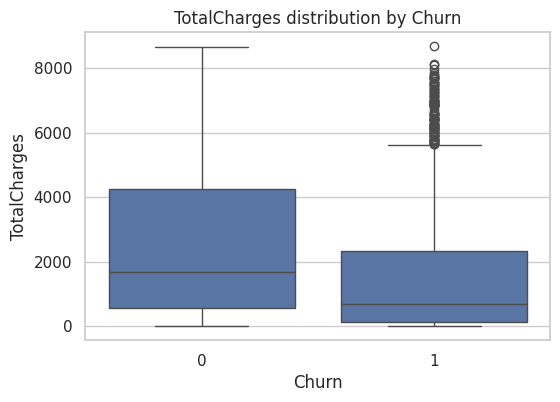

In [ ]:
# Exploratory Data Analysis

# Plot distributions for numeric features vs churn
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot boxplots to visualize distributions by Churn class
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} distribution by Churn")
    plt.show()


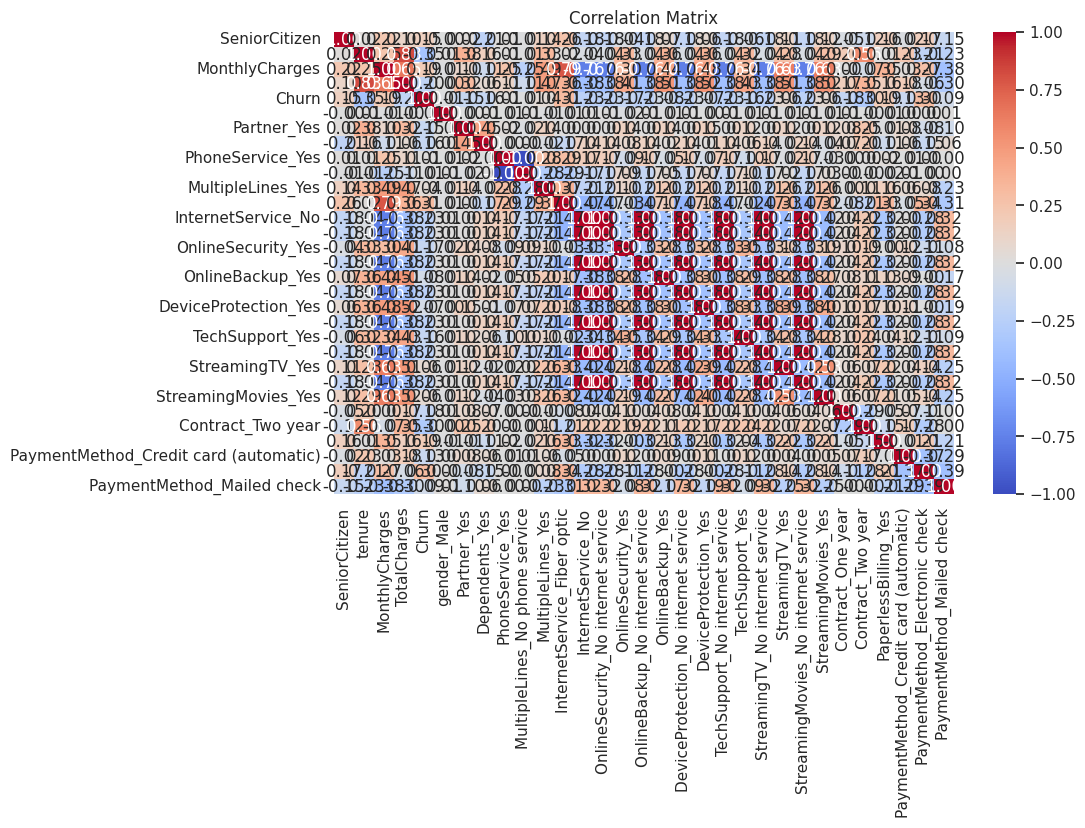

In [ ]:
# Create a correlation matrix of numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Outlier Dectection And Removing Using Z-Score Method

# Calculate Z-score for numeric columns
z_scores = np.abs(zscore(df[num_features]))

# Find outliers (Z > 3)
outlier_rows = (z_scores > 3).any(axis=1)

# Number of outliers
print("Outliers detected:", outlier_rows.sum())

# Optional: drop outliers or keep them depending on business logic
df_cleaned = df[~outlier_rows]


Outliers detected: 0


In [ ]:
# Separate input features (X) and target column (y)
X = df_cleaned.drop('Churn', axis=1)   # drop target column
y = df_cleaned['Churn']                # binary target: 0 = No, 1 = Yes

In [ ]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% for testing
    random_state=42,        # ensures reproducibility
    stratify=y              # preserves class distribution
)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (5634, 30)
Testing Set Size: (1409, 30)


In [ ]:
# Initialize StandardScaler (z = (x - mean) / std)
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Shape:", X_train_scaled.shape)
print("Scaled Testing Shape:", X_test_scaled.shape)


Scaled Training Shape: (5634, 30)
Scaled Testing Shape: (1409, 30)


In [ ]:
# Initialize the ANN
model = Sequential()

# Input layer + First hidden layer with 16 neurons and ReLU activation
model.add(Dense(units=16, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Optional: Dropout to prevent overfitting
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(units=8, activation='relu'))

# Output layer (1 neuron for binary classification, sigmoid activation)
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the ANN
model.compile(
    optimizer='adam',              # optimizer for weight updates
    loss='binary_crossentropy',    # loss function for binary classification
    metrics=['accuracy']           # metric to monitor
)

In [ ]:
# Train the ANN on training data
history = model.fit(
    X_train_scaled, y_train,        # input and target
    validation_split=0.2,           # use 20% of training set for validation
    batch_size=32,                  # number of samples per gradient update
    epochs=50,                      # number of full training cycles
    verbose=1                       # display training progress
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6368 - loss: 0.6324 - val_accuracy: 0.7578 - val_loss: 0.4921
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7629 - loss: 0.4800 - val_accuracy: 0.7817 - val_loss: 0.4680
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7723 - loss: 0.4603 - val_accuracy: 0.7862 - val_loss: 0.4582
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7742 - loss: 0.4497 - val_accuracy: 0.7755 - val_loss: 0.4537
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7869 - loss: 0.4421 - val_accuracy: 0.7782 - val_loss: 0.4500
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7896 - loss: 0.4312 - val_accuracy: 0.7844 - val_loss: 0.4489
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7951 - loss: 0.4408 - val_accuracy: 0.7844 - val_loss: 0.4475
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7905 - loss: 0.4436 - val_accuracy: 0.

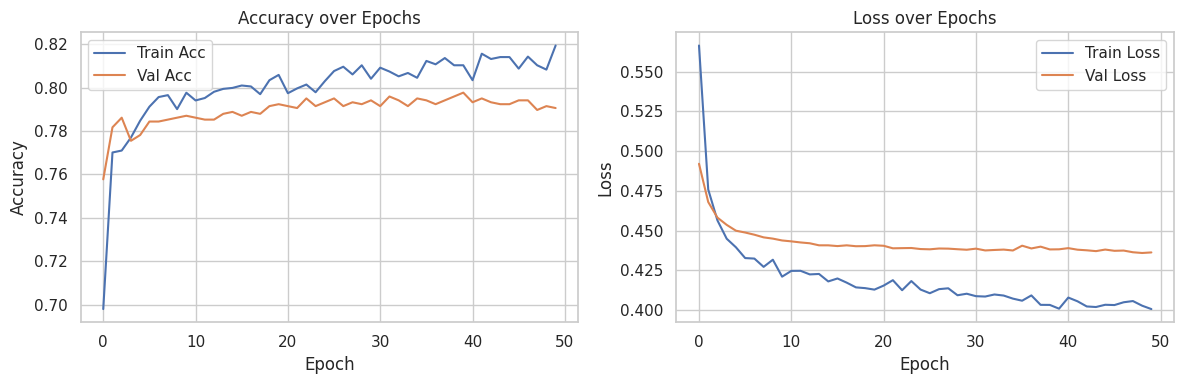

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Predict probabilities (values between 0 and 1)
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to binary (0 or 1) using 0.5 threshold
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


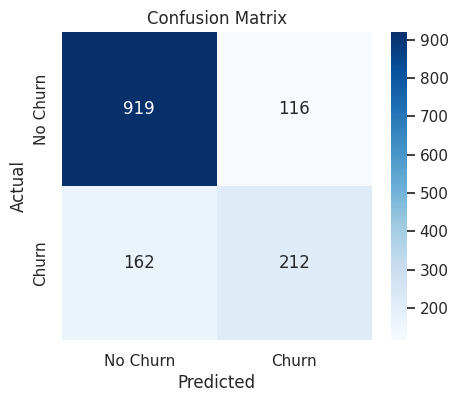

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Print Precision, Recall, F1-Score, Accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



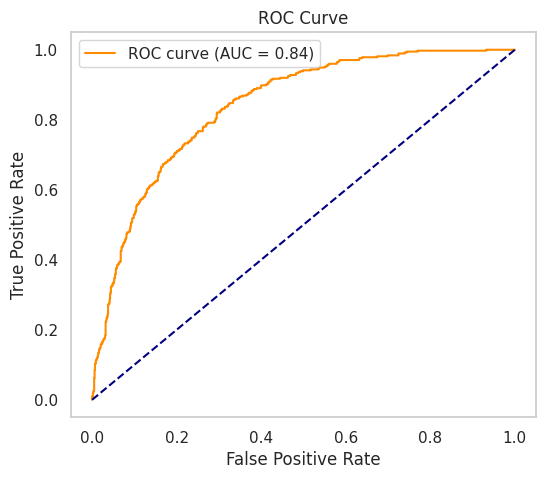

In [ ]:
# Compute ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [ ]:
def get_user_input_and_predict(model, scaler, feature_columns):
    """
    Prompts user to enter input values for all features, makes prediction, and prints results.

    Args:
        model: Trained ANN model
        scaler: Fitted StandardScaler
        feature_columns: List of feature column names used in training
    """
    print("\n🔍 Please enter the following customer details:\n")
    input_data = {}

    # Collect input for each feature
    for col in feature_columns:
        while True:
            try:
                value = float(input(f"Enter value for '{col}': "))
                input_data[col] = value
                break
            except ValueError:
                print(f"❌ Invalid input for '{col}'. Please enter a numeric value.")

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Scale input
    input_scaled = scaler.transform(input_df)

    # Predict
    prob = model.predict(input_scaled)[0][0]
    pred = 'Churn' if prob > 0.5 else 'No Churn'

    # Output
    print("\n📊 Prediction:", pred)
    print("🔢 Probability of Churn: {:.2f}%".format(prob * 100))


In [152]:
# Call function (after training and scaling are done)
get_user_input_and_predict(model, scaler, list(X.columns))


🔍 Please enter the following customer details:

Enter value for 'SeniorCitizen': 2
Enter value for 'tenure': 3
Enter value for 'MonthlyCharges': 
❌ Invalid input for 'MonthlyCharges'. Please enter a numeric value.
Enter value for 'MonthlyCharges': 3
Enter value for 'TotalCharges': 5
Enter value for 'gender_Male': 2
Enter value for 'Partner_Yes': 
❌ Invalid input for 'Partner_Yes'. Please enter a numeric value.
Enter value for 'Partner_Yes': 1
Enter value for 'Dependents_Yes': 1
Enter value for 'PhoneService_Yes': 2
Enter value for 'MultipleLines_No phone service': 3
Enter value for 'MultipleLines_Yes': 2
Enter value for 'InternetService_Fiber optic': 0
Enter value for 'InternetService_No': 3
Enter value for 'OnlineSecurity_No internet service': 2
Enter value for 'OnlineSecurity_Yes': 1
Enter value for 'OnlineBackup_No internet service': 1
Enter value for 'OnlineBackup_Yes': 1
Enter value for 'DeviceProtection_No internet service': 1
Enter value for 'DeviceProtection_Yes': 1
Enter valu

In [153]:
# =====================================
# ✅ Conclusion
# =====================================

"""
This project successfully demonstrates an end-to-end application of an Artificial Neural Network (ANN)
to predict customer churn based on key business metrics such as tenure, monthly charges, and total charges.

Key achievements:
- Conducted data cleaning, EDA, and outlier detection
- Built and trained an ANN model using TensorFlow
- Evaluated the model with classification metrics and AUC
- Created a custom prediction function
- Integrated a simple web interface using Flask and HTML

This workflow is easily extendable for real-world deployment and business use.

"""

# =====================================
# 🙏 Thank You!
# ✍️ Nikhil Salunke
# =====================================